In [133]:
from google.colab import files
file=files.upload()

Saving customer_segmentation (1).csv to customer_segmentation (1) (1).csv


In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
data=pd.read_csv("customer_segmentation (1).csv")
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [136]:
data1=data.drop(columns=['NumWebVisitsMonth','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Complain','Z_CostContact','Z_Revenue','Response'],axis=1,inplace=True)

In [137]:
data.drop(columns=['MntSweetProducts','MntFishProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases'],axis=1,inplace=True)

In [138]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2216 non-null   int64  
 1   Year_Birth       2216 non-null   int64  
 2   Education        2216 non-null   object 
 3   Marital_Status   2216 non-null   object 
 4   Income           2216 non-null   float64
 5   Kidhome          2216 non-null   int64  
 6   Teenhome         2216 non-null   int64  
 7   Dt_Customer      2216 non-null   object 
 8   Recency          2216 non-null   int64  
 9   MntWines         2216 non-null   int64  
 10  MntFruits        2216 non-null   int64  
 11  MntMeatProducts  2216 non-null   int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 225.1+ KB


In [ ]:
#Kidhome  The number of young children in the household.
#Teenhome  The number of teenagers in the household.
#Dt_Customer The date when the customer was first enrolled or became a part of the company's database.
#Recency  The number of days since the last purchase or interaction.
#MntWines  The amount spent on wines.

<ipython-input-139-6fd6530afecf>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_income,palette=['red', 'Orange', 'yellow', 'green','purple'])


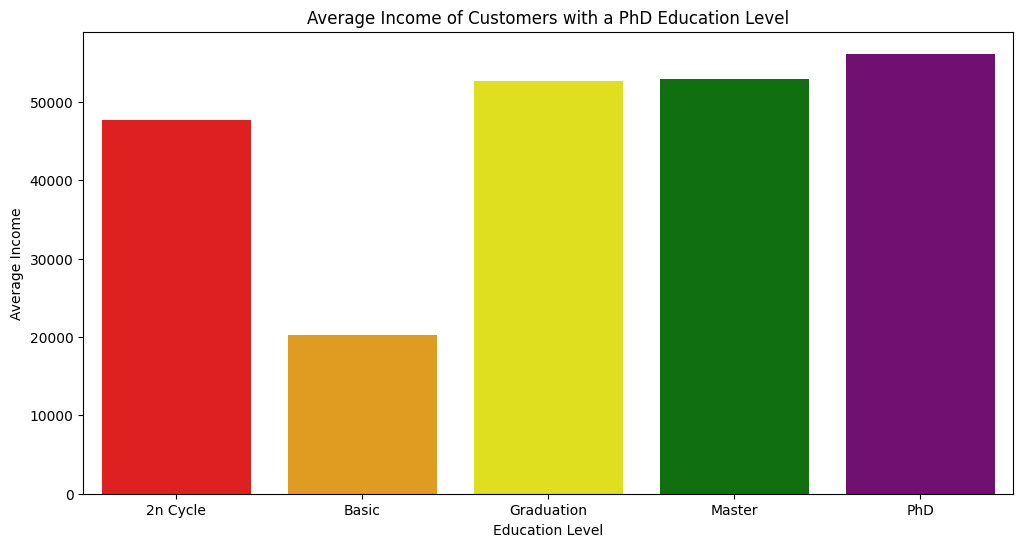

In [139]:
#In which education got highest income

average_income=data.groupby('Education')['Income'].mean()
plt.figure(figsize=(12, 6))
sns.barplot(data=average_income,palette=['red', 'Orange', 'yellow', 'green','purple'])
plt.xlabel('Education Level')
plt.ylabel('Average Income')
plt.title('Average Income of Customers with a PhD Education Level')
plt.show()

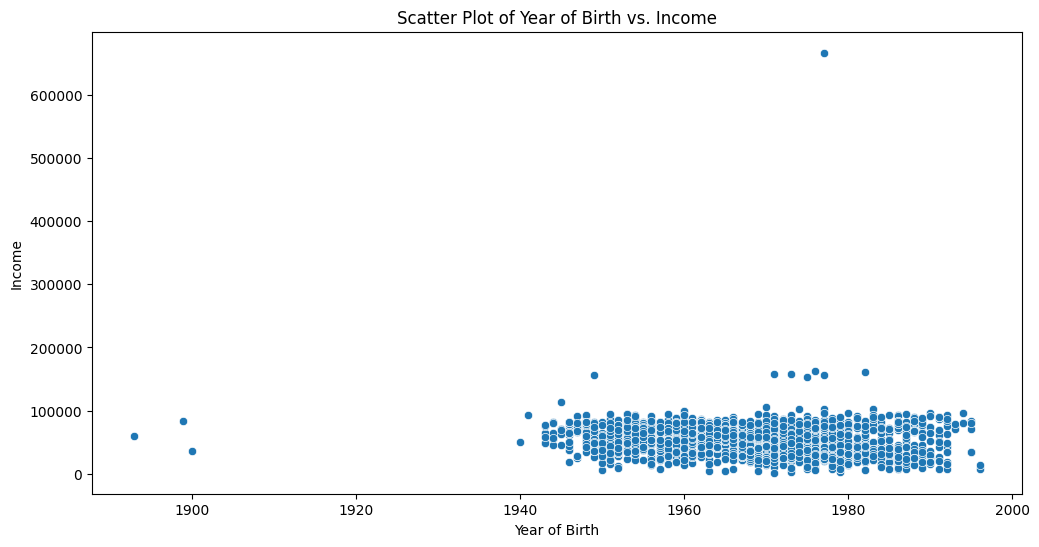

In [140]:
#How is income distributed among different birth years
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Year_Birth', y='Income', data=data)
plt.xlabel('Year of Birth')
plt.ylabel('Income')
plt.title('Scatter Plot of Year of Birth vs. Income')
plt.show()


In [141]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')
data['year']=data['Dt_Customer'].dt.year
data.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,year
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,2012
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2014
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,2013
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,2014
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,2014


In [142]:
customer_counts = data['year'].value_counts().sort_index()
customer_counts

2012     490
2013    1173
2014     553
Name: year, dtype: int64

<ipython-input-143-c845d42bf3f3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['year'], palette='Blues_d')


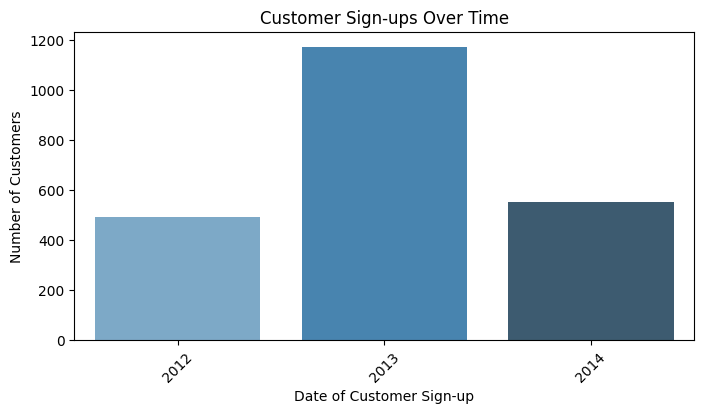

In [143]:
#Customer Sign-ups Over Time

customer_counts = data['year'].value_counts().sort_index()
plt.figure(figsize=(8, 4))
sns.countplot(x=data['year'], palette='Blues_d')
plt.xlabel('Date of Customer Sign-up')
plt.ylabel('Number of Customers')
plt.title('Customer Sign-ups Over Time')
plt.xticks(rotation=45)
plt.show()

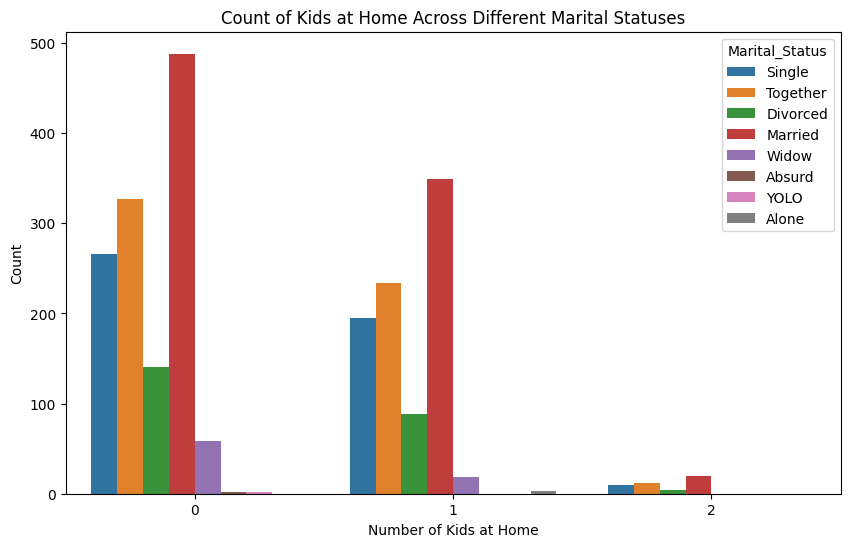

In [144]:
#Which marital status has the highest count of families with no kids at home?
plt.figure(figsize=(10, 6))
sns.countplot(x='Kidhome', data=data, hue='Marital_Status')
plt.xlabel('Number of Kids at Home')
plt.ylabel('Count')
plt.title('Count of Kids at Home Across Different Marital Statuses')
plt.show()

<Axes: xlabel='Year_Birth'>

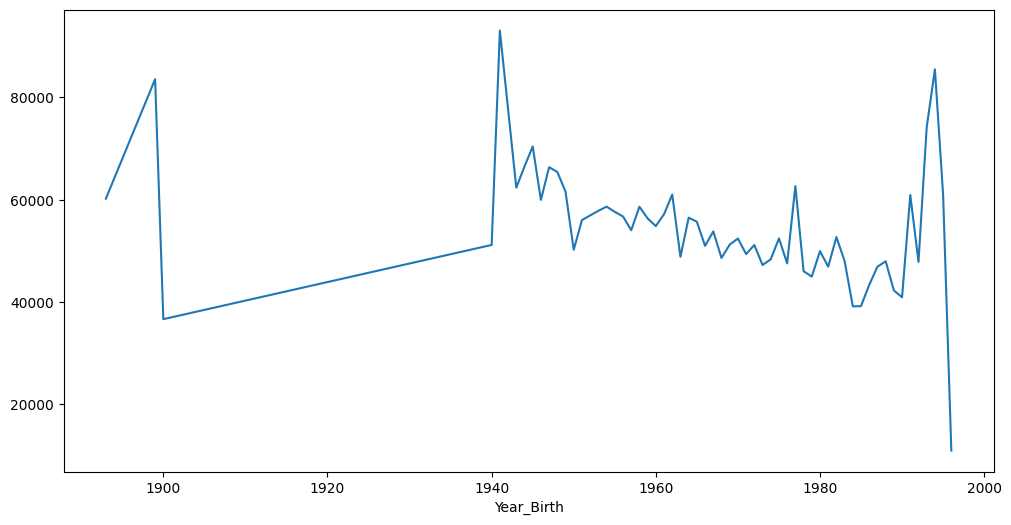

In [145]:
#Birth year wise avgerge income
avg_income=data.groupby('Year_Birth')['Income'].mean()
avg_income
plt.figure(figsize=(12,6))
sns.lineplot(x=avg_income.index,y=avg_income.values)

<ipython-input-209-185bb89a1710>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data['MntWines'],bins=7,kde=False)


Text(0, 0.5, 'count')

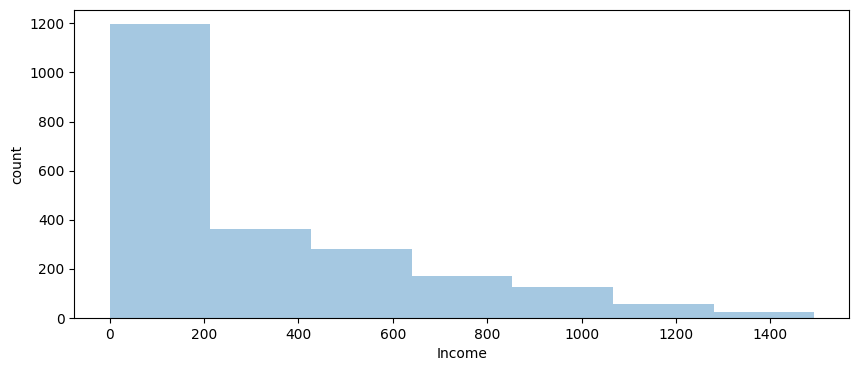

In [209]:
#What is the most common spending range for wines?
plt.figure(figsize=(10,4))
sns.distplot(x=data['MntWines'],bins=7,kde=False)
plt.xlabel("Income")
plt.ylabel("count")

<ipython-input-210-393b2f9b4299>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data['MntFruits'],bins=7,hist=False)


Text(0, 0.5, 'count')

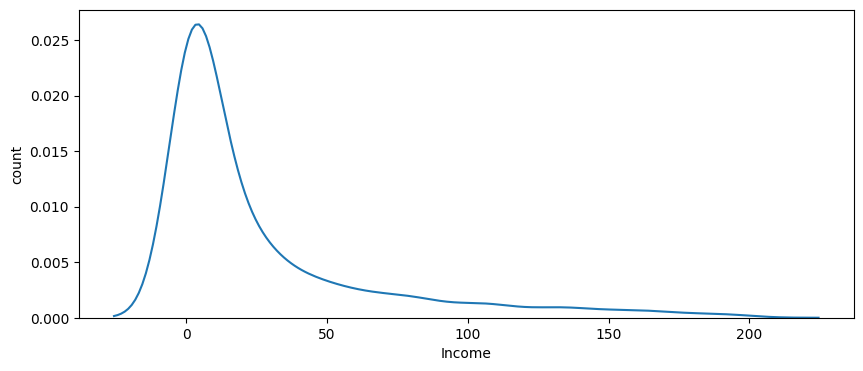

In [210]:
#What is the most common spending range for MntFruits?
plt.figure(figsize=(10,4))
sns.distplot(x=data['MntFruits'],bins=7,hist=False)
plt.xlabel("Income")
plt.ylabel("count")

Education
2n Cycle      47633.190000
Basic         20306.259259
Graduation    52720.373656
Master        52917.534247
PhD           56145.313929
Name: Income, dtype: float64

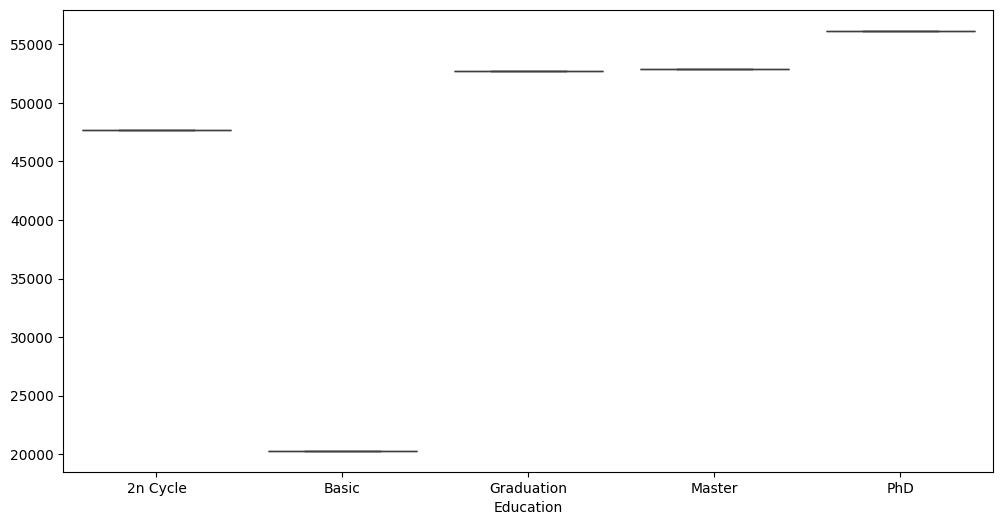

In [211]:
#How does the average income vary across different levels of education?
average_incomee=data.groupby('Education')['Income'].mean()
plt.figure(figsize=(12, 6))
sns.boxplot(x=average_incomee.index,y=average_incomee.values)
average_incomee

In [ ]:
#Linear Regression

In [150]:
x=data[['Year_Birth']]

In [151]:
y=data[['Income']]

In [152]:
from sklearn.model_selection import train_test_split

In [153]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [154]:
x_train.shape

(1772, 1)

In [155]:
from sklearn.linear_model import LinearRegression

In [156]:
lm=LinearRegression()

In [157]:
lm.fit(x_train,y_train)

LinearRegression()

In [158]:
y_pred=lm.predict(x_test)

In [160]:
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 422046336.61
Coefficient of determination: 0.05


In [173]:
lm.predict([[1957]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[56372.25164164]])